In [1]:
import pandas as pd
import numpy as np

### for data preprocessing
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder

### for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### reading all the necessary data

df = pd.read_csv('skillshare_combined.csv')

pmt_ux = pd.read_csv('lookup_payment_ux.csv', usecols = ['payment_ux', 'payment_ux_cat_codes'])
trial_info = pd.read_csv('lookup_trial_length_offer.csv', usecols = ['trial_length_offer', 
                                                                     'trial_length_offer_cat_codes'])
sub_channel = pd.read_csv('lookup_sub_utm_channel.csv', usecols = ['sub_utm_channel', 'sub_utm_channel_cat_codes'])

join1 = pd.merge(df, pmt_ux, on = ["payment_ux_cat_codes"], how = "left")
join2 = pd.merge(join1, trial_info, on = ["trial_length_offer_cat_codes"], how = "left")
join3 = pd.merge(join2, sub_channel, on = ["sub_utm_channel_cat_codes"], how = "left")

In [3]:
join3.keys()

Index(['user_uid', 'create_time', 'success', 'cancellation_time',
       'payment_provider_cat_codes', 'payment_ux_cat_codes',
       'trial_length_offer_cat_codes', 'sub_utm_channel_cat_codes',
       'sub_utm_source_cat_codes', 'trial_start_day', 'trial_end_day',
       'is_cancel_during_trial', 'day-1', 'day-2', 'day-3', 'day-4', 'day-5',
       'day-6', 'day-7', 'day-8', 'day-9', 'day-10', 'day-11', 'day-12',
       'day-13', 'day-14', 'day-15', 'day-16', 'day-17', 'day-18', 'day-19',
       'day-20', 'day-21', 'day-22', 'day-23', 'day-24', 'day-25', 'day-26',
       'day-27', 'day-28', 'day-29', 'day-30', 'day-31', 'comment_volume',
       'comment_score', 'discussion_volume', 'discussion_score',
       'follow_volume', 'projects_volume', 'projects_score', 'review_volume',
       'rating_avg', 'payment_ux', 'trial_length_offer', 'sub_utm_channel'],
      dtype='object')

In [4]:
### main dataset to be used for classification

df_main = join3.loc[join3["payment_ux_cat_codes"]>=0].loc[:, ['success', 'day-1',
       'day-2', 'day-3', 'day-4', 'day-5','day-6', 'day-7', 'day-8', 'day-9','day-10', 'day-11', 'day-12', 'day-13', 'day-14', 'day-15', 'day-16', 
        'day-17', 'day-18', 'day-19', 'day-20', 'day-21', 'day-22', 'day-23','day-24','day-25', 'day-26', 'day-27','day-28', 'day-29', 'day-30','day-31', 
                                                              'trial_length_offer', 'sub_utm_channel']]

In [5]:
df_main.shape

(413524, 34)

In [6]:
df_main.head()

,success,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,...,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,trial_length_offer,sub_utm_channel
0,0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Month,Paid Search (Brand)
2,1,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Month,Paid Search (Brand)
3,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Month,Teacher Referral
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Month,Teacher Referral
5,1,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Month,Paid Search (Brand)


In [7]:
### checking for any missing data

df_main.isna().sum()

success               0
day-1                 0
day-2                 0
day-3                 0
day-4                 0
day-5                 0
day-6                 0
day-7                 0
day-8                 0
day-9                 0
day-10                0
day-11                0
day-12                0
day-13                0
day-14                0
day-15                0
day-16                0
day-17                0
day-18                0
day-19                0
day-20                0
day-21                0
day-22                0
day-23                0
day-24                0
day-25                0
day-26                0
day-27                0
day-28                0
day-29                0
day-30                0
day-31                0
trial_length_offer    0
sub_utm_channel       0
dtype: int64

### Preparing the data

First we'll try to run Logistic Regression for classification. As we have categorical features in the data, we need to transform those features into dummy variables. That way the Logistic Regression will work.

In [8]:
#### one hot encoding, to get dummy variables for categorical ones

dummies = pd.get_dummies(df_main[['trial_length_offer', 'sub_utm_channel']]).drop(['trial_length_offer_One Week',
                                                                                  'sub_utm_channel_Other'],
                                                                                 axis = 1)
df_main = df_main.join(dummies).drop(['trial_length_offer', 'sub_utm_channel'], axis =1)

In [9]:
df_main.loc[:, 'success'] = df_main.loc[:, 'success'].astype(int)

In [10]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413524 entries, 0 to 475447
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   success                                  413524 non-null  int64  
 1   day-1                                    413524 non-null  float64
 2   day-2                                    413524 non-null  float64
 3   day-3                                    413524 non-null  float64
 4   day-4                                    413524 non-null  float64
 5   day-5                                    413524 non-null  float64
 6   day-6                                    413524 non-null  float64
 7   day-7                                    413524 non-null  float64
 8   day-8                                    413524 non-null  float64
 9   day-9                                    413524 non-null  float64
 10  day-10                          

In [27]:
### Scaling the data for continuous variables, so that the algorithm will work more efficiently

scaled_data = df_main.copy()
scaled_array = StandardScaler().fit_transform(df_main.iloc[:, 1:31])
scaled_data.iloc[:, 1:31] = scaled_array


### defining X, y
features = scaled_data.keys()[1:]
X = scaled_data[features]
y = scaled_data['success']

In [28]:
X.head()

,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,...,sub_utm_channel_Paid Insta Stories,sub_utm_channel_Paid Search (Brand),sub_utm_channel_Paid Search (Non-brand),sub_utm_channel_Podcast,sub_utm_channel_Sponsored Newsletter,sub_utm_channel_Sponsored Posts,sub_utm_channel_Student Referral,sub_utm_channel_Teacher Referral,sub_utm_channel_Youtube Influencer,sub_utm_channel_Youtube Pre-roll
0,-0.460150,-0.318674,-0.232646,-0.204933,-0.188747,-0.179041,-0.167738,-0.142773,-0.131375,-0.121264,...,0,1,0,0,0,0,0,0,0,0
2,-0.351146,-0.318674,-0.232646,-0.204933,-0.188747,-0.179041,-0.167738,-0.142773,-0.131375,-0.121264,...,0,1,0,0,0,0,0,0,0,0
3,-0.022995,-0.188356,-0.232646,-0.204933,-0.188747,-0.179041,-0.167738,-0.142773,-0.131375,-0.121264,...,0,0,0,0,0,0,0,1,0,0
4,-0.482938,-0.318674,-0.232646,-0.204933,-0.188747,-0.179041,-0.167738,-0.142773,-0.131375,-0.121264,...,0,0,0,0,0,0,0,1,0,0
5,-0.460529,-0.318674,-0.232646,-0.204933,-0.188747,-0.179041,-0.167738,-0.142773,-0.131375,-0.121264,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#!pip install imbalanced-learn

In [ ]:
#!pip install delayed

In [29]:
df_main.groupby(['success']).size()

success
0    319036
1     94488
dtype: int64

We have imbalanced/skewed data. Only 23% of data is labeled as "success". This will distort the classification model prediction results. So, we'll do oversampling, in order to balance the data.

In [30]:
# the old class distribution
print(Counter(y))
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# the new class distribution
print(Counter(y_over))

Counter({0: 319036, 1: 94488})
Counter({0: 319036, 1: 319036})


Now we got the same number of instances for each class.

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X_over,y_over,test_size=0.2,random_state=40)

## Logistic Regression

In [63]:
### training Logistic Regression on the training dataset

logit = LogisticRegression(max_iter = 1000)
logit.fit(X_train,y_train)

#predicting values for y on testing dataset
y_pred_l = logit.predict(X_test)

In [33]:
### Printing performance measures

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_l))
print("Precision:",metrics.precision_score(y_test, y_pred_l))
print("Recall:",metrics.recall_score(y_test, y_pred_l))

Accuracy: 0.5858715668220821
Precision: 0.5861501716201895
Recall: 0.5813592293934925


In [34]:
### confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_l)
cnf_matrix

array([[37709, 26164],
       [26685, 37057]])

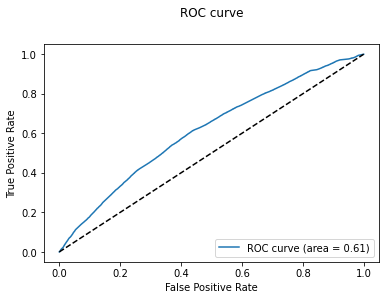

In [64]:
### Plotting the ROC curve

y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label= 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.title('ROC curve', y=1.1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [57]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.6136670033077325

 With Logistic Regression we got that AUC score (Area under the curve) is only about 61.3%.

Text(0.5, 257.44, 'Predicted label')

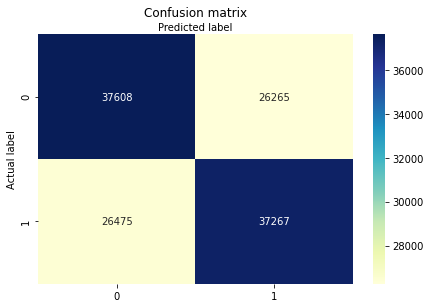

In [21]:
### plotting confusion matrix heatmap

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Decision Tree

Now, we'll make classification with decision tree to see if it performs better than Logistic Regression.

In [65]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [66]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7588763076440858
Precision: 0.7477495078222449
Recall: 0.7805842301779047


We got 76% Accuracy rate. Which is a much better performance than in the case of Logistic regression.

In [67]:
y_score = clf.predict_proba(X_test)[:,1]

metrics.roc_auc_score(y_test, y_score)

0.82348360541347

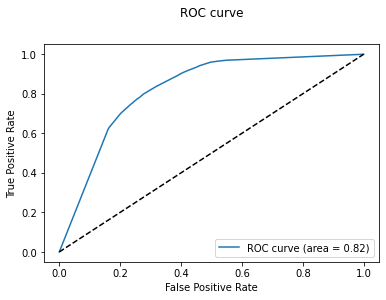

In [69]:
### Plotting the ROC curve

fpr, tpr, _ = metrics.roc_curve(y_test,  y_score)
auc = metrics.roc_auc_score(y_test, y_score)
plt.plot(fpr,tpr,label= 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.title('ROC curve', y=1.1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### With 76% accuracy rate and 82% AUC score, we can say that Decision tree performed well with our dataset.